In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from datetime import date, timedelta
from scipy.interpolate import interp1d
import numpy as np
from scipy import stats

In [3]:
gpr_data = requests.get(f"https://github.com/iacoviel/iacoviel.github.io/raw/master/gpr_archive_files/data_gpr_export_202408.xls").content
gpr_df = pd.read_excel(io.BytesIO(gpr_data)).set_index("month")["2022-01-01":]
gpr_df = gpr_df[['GPR', 'SHARE_GPR', 'GPRT', 'GPRA', 'GPRC_USA', 'GPR_BASIC', 'GPR_NOEW', 'GPR_AND']]
gpr_df.head()

,GPR,SHARE_GPR,GPRT,GPRA,GPRC_USA,GPR_BASIC,GPR_NOEW,GPR_AND
month,,,,,,,,
2022-01-01,138.674988,4.159395,199.487518,63.251530,3.315881,162.787338,174.142807,135.375610
2022-02-01,216.159012,6.483439,320.605865,105.218307,4.877680,287.502899,270.097809,173.387543
2022-03-01,318.954926,9.566683,403.713623,250.955856,6.899374,405.902893,389.822449,284.315430
2022-04-01,191.143097,5.733116,221.910553,184.417816,3.965940,228.429352,205.864838,172.318939
2022-05-01,142.258484,4.266878,166.424561,140.137344,3.146398,173.042816,160.359512,135.051697


In [4]:
gpr_df["GPR_USA"] = (gpr_df["GPRC_USA"] / 100) * gpr_df["GPR"]
gpr_df.head()

,GPR,SHARE_GPR,GPRT,GPRA,GPRC_USA,GPR_BASIC,GPR_NOEW,GPR_AND,GPR_USA
month,,,,,,,,,
2022-01-01,138.674988,4.159395,199.487518,63.251530,3.315881,162.787338,174.142807,135.375610,4.598298
2022-02-01,216.159012,6.483439,320.605865,105.218307,4.877680,287.502899,270.097809,173.387543,10.543546
2022-03-01,318.954926,9.566683,403.713623,250.955856,6.899374,405.902893,389.822449,284.315430,22.005893
2022-04-01,191.143097,5.733116,221.910553,184.417816,3.965940,228.429352,205.864838,172.318939,7.580620
2022-05-01,142.258484,4.266878,166.424561,140.137344,3.146398,173.042816,160.359512,135.051697,4.476018


In [55]:
billboard_df = pd.read_csv("billboard.csv")
billboard_df["chart_week"] = pd.to_datetime(billboard_df["chart_week"])

top_dfs = []
for i in range(1, 6):
    top_dfs.append(billboard_df.loc[billboard_df["current_week"] == i])
    
top_5_dfs = pd.concat(top_dfs)
top_5_dfs.head()

,chart_week,current_week,title,performer,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,valence,time_signature,duration_ms,genres
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,0.336,0.627,-7.463,0.0384,0.164,0.0708,150.273,0.35,4,241107,"['dance pop', 'pop', 'urban contemporary']"
10,2022-01-08,1,All I Want For Christmas Is You,Mariah Carey,0.336,0.627,-7.463,0.0384,0.164,0.0708,150.273,0.35,4,241107,"['dance pop', 'pop', 'urban contemporary']"
20,2022-01-15,1,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.578,0.1330,141.981,0.13,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']"
30,2022-01-22,1,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.578,0.1330,141.981,0.13,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']"
40,2022-01-29,1,Easy On Me,Adele,0.604,0.366,-7.519,0.0282,0.578,0.1330,141.981,0.13,4,224695,"['british soul', 'pop', 'pop soul', 'uk pop']"


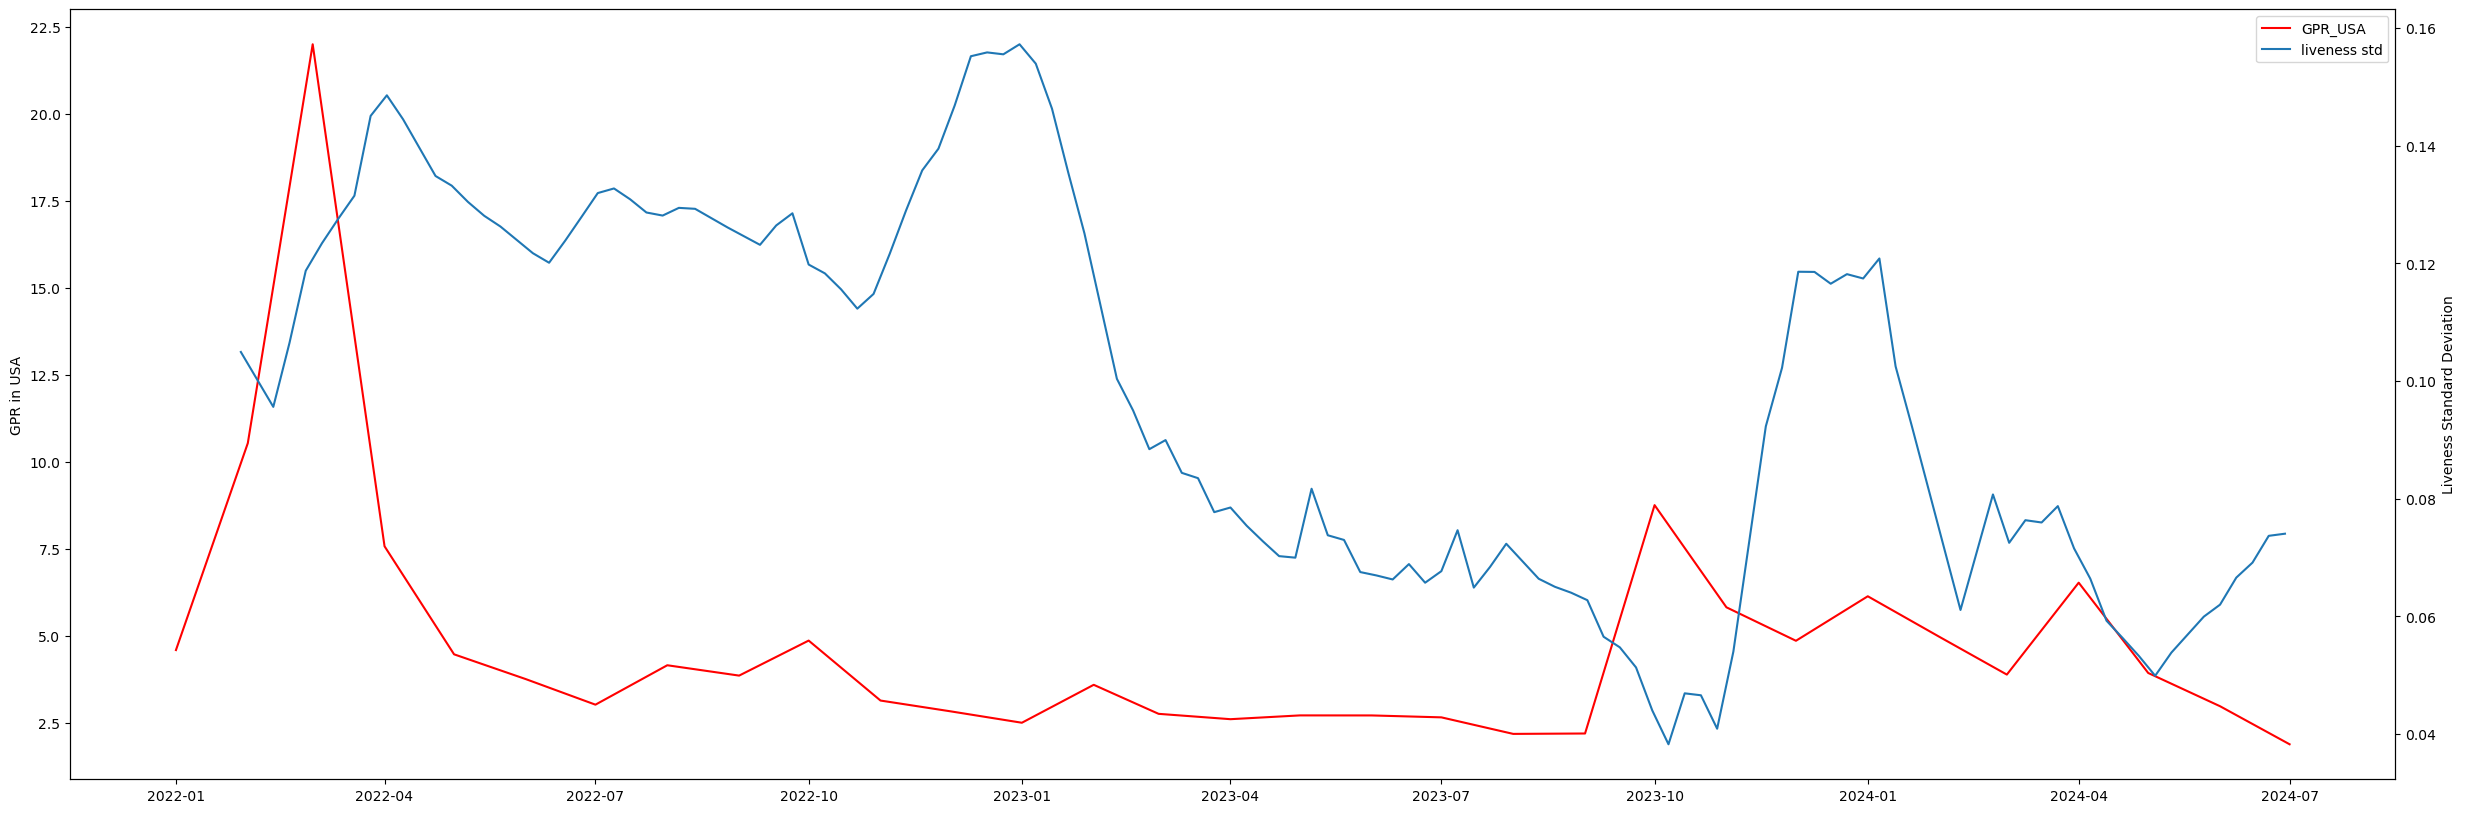

In [56]:
data = top_5_dfs.groupby("chart_week")["liveness"].agg(["std"])

window_size = 10
smoothed_data = data.rolling(window=window_size).mean().shift(-5)

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
line_1 = ax1.plot(gpr_df.index, gpr_df["GPR_USA"], "-r", label="GPR_USA")
ax2 = ax1.twinx()
line_2 = ax2.plot(smoothed_data.index, smoothed_data["std"], label="liveness std")

lns = line_1+line_2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_ylabel("GPR in USA")
ax2.set_ylabel("Liveness Standard Deviation")

plt.show()

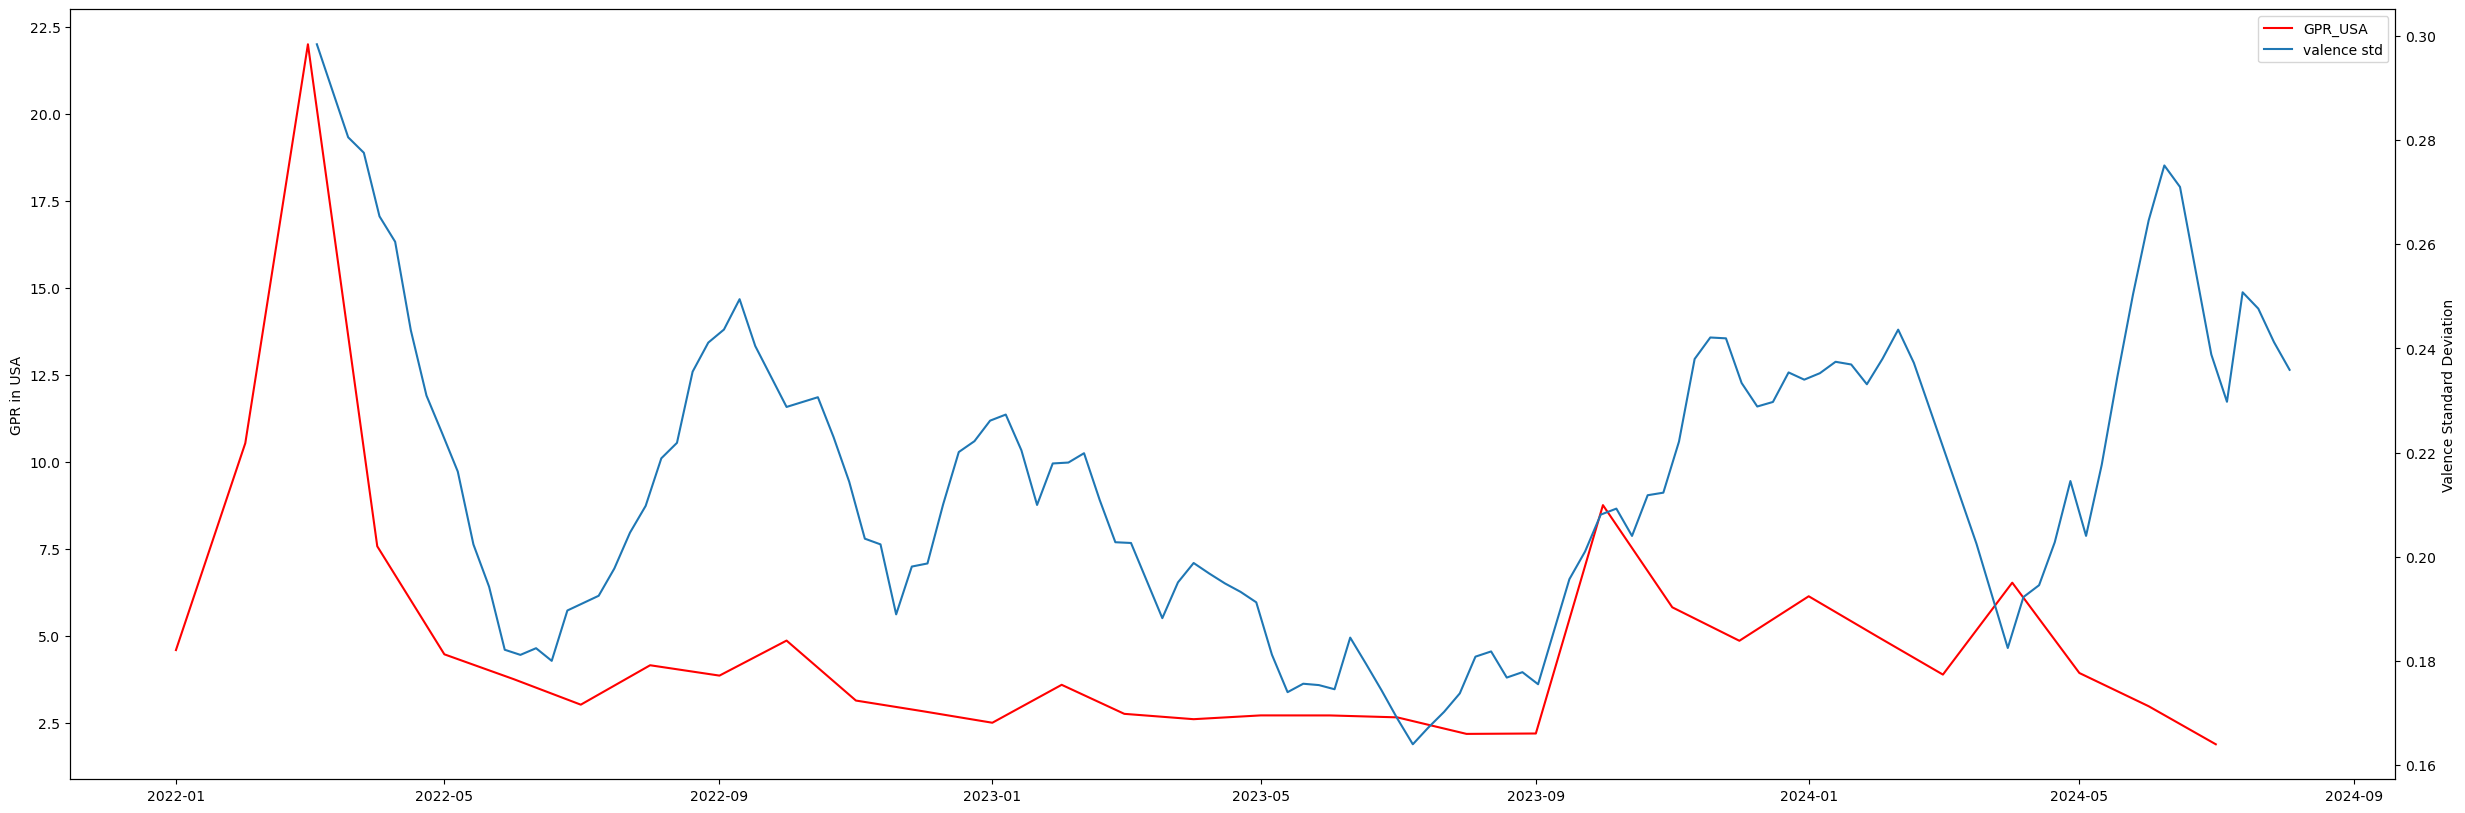

In [57]:
data = top_5_dfs.groupby("chart_week")["valence"].agg(["std"])

window_size = 10
smoothed_data = data.rolling(window=window_size).mean()

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
line_1 = ax1.plot(gpr_df.index, gpr_df["GPR_USA"], "-r", label="GPR_USA")
ax2 = ax1.twinx()
line_2 = ax2.plot(smoothed_data.index, smoothed_data["std"], label="valence std")

lns = line_1+line_2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_ylabel("GPR in USA")
ax2.set_ylabel("Valence Standard Deviation")

plt.show()

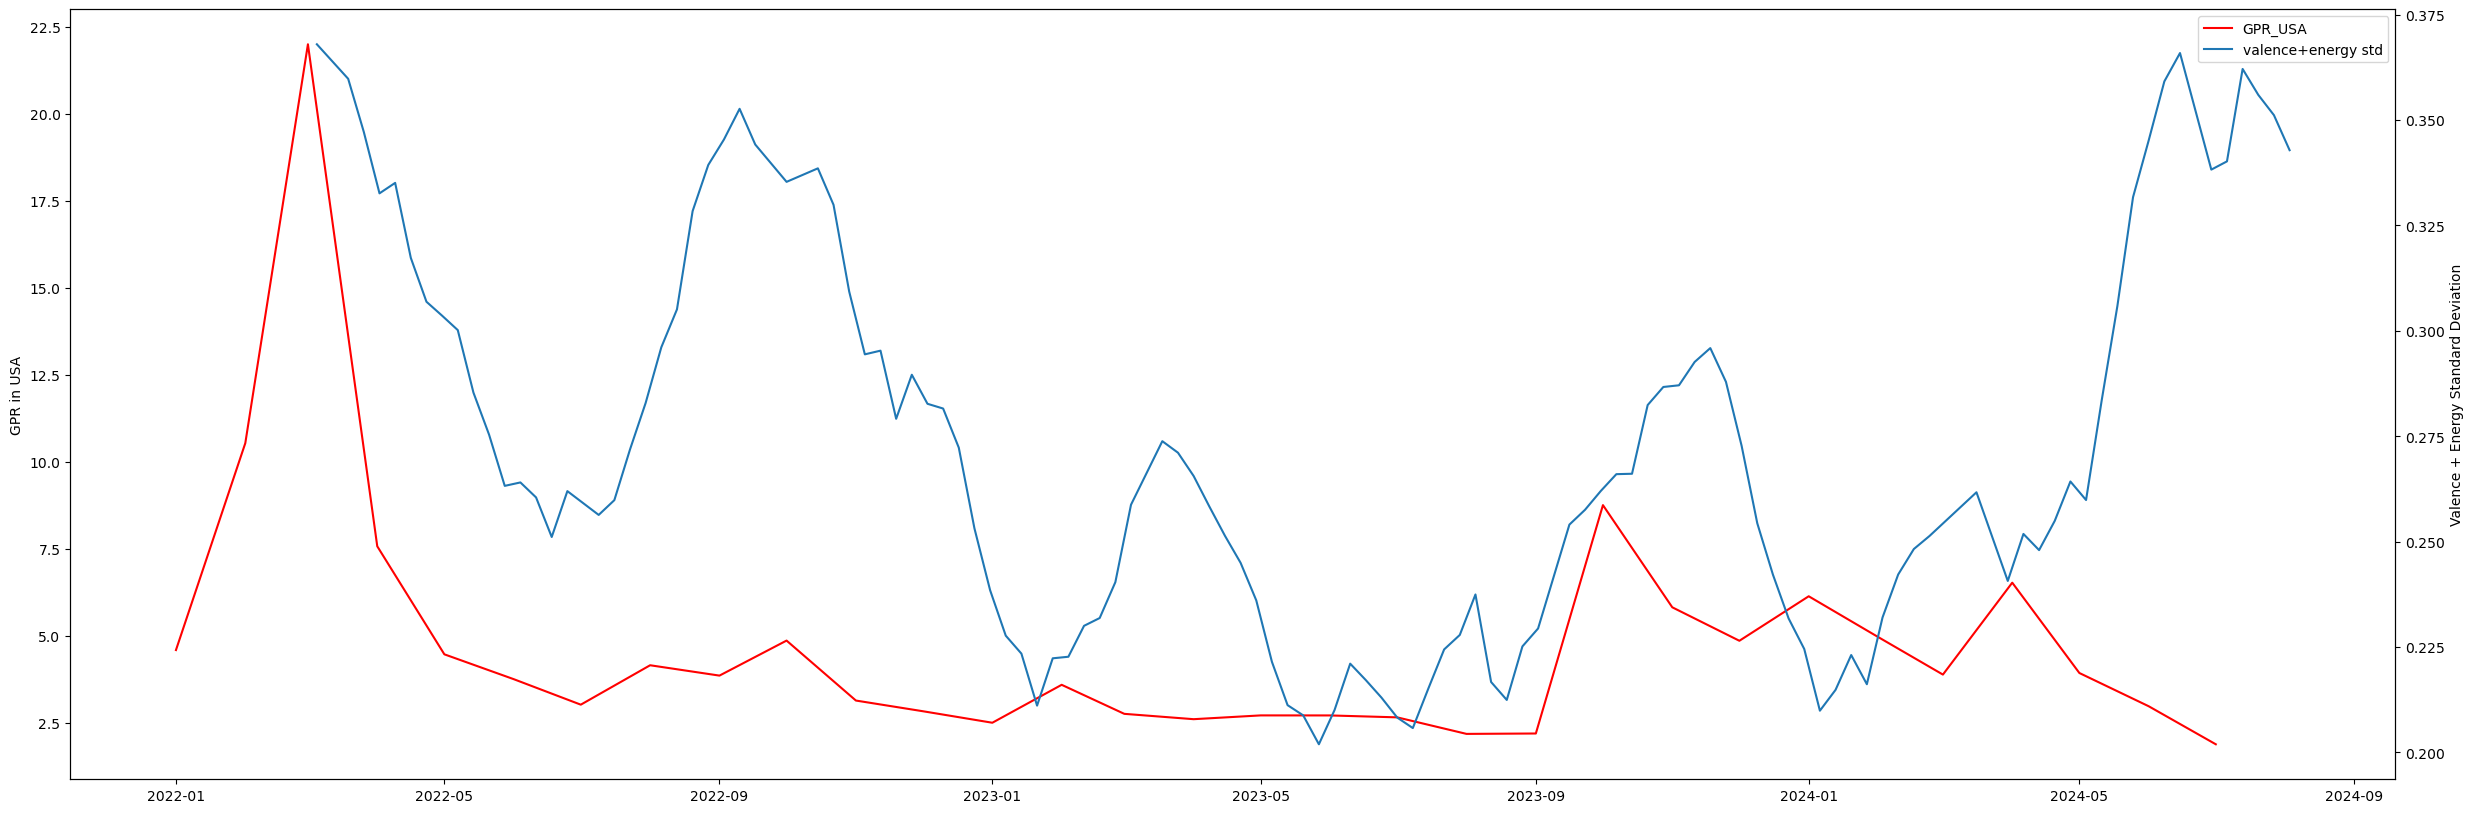

In [58]:
top_5_dfs["valence+energy"] = top_5_dfs["valence"] + top_5_dfs["energy"]
data = top_5_dfs.groupby("chart_week")["valence+energy"].agg(["std"])

window_size = 10
smoothed_data = data.rolling(window=window_size).mean()

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
line_1 = ax1.plot(gpr_df.index, gpr_df["GPR_USA"], "-r", label="GPR_USA")
ax2 = ax1.twinx()
line_2 = ax2.plot(smoothed_data.index, smoothed_data["std"], label="valence+energy std")

lns = line_1+line_2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_ylabel("GPR in USA")
ax2.set_ylabel("Valence + Energy Standard Deviation")

plt.show()

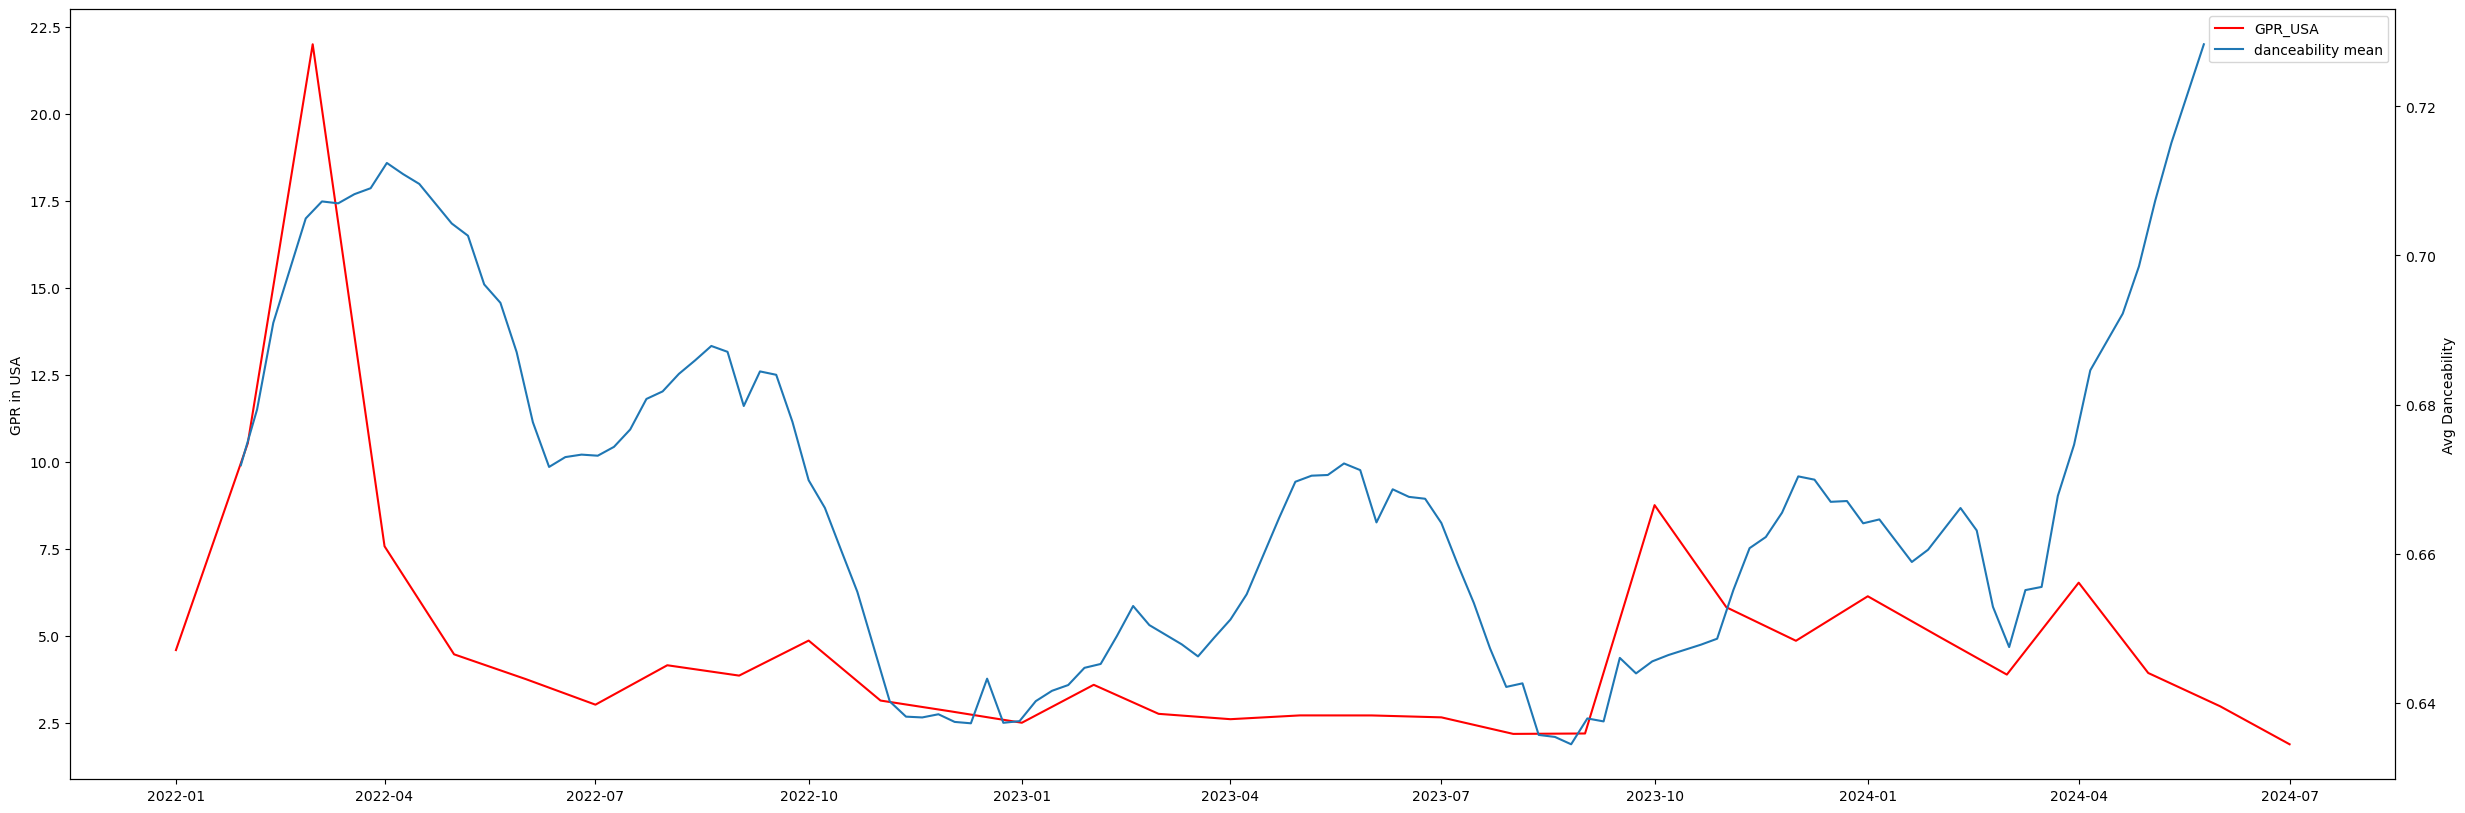

In [59]:
data = top_5_dfs.groupby("chart_week")["danceability"].agg(["mean"])

window_size = 15
smoothed_data = data.rolling(window=window_size).mean().shift(-10)

fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
line_1 = ax1.plot(gpr_df.index, gpr_df["GPR_USA"], "-r", label="GPR_USA")
ax2 = ax1.twinx()
line_2 = ax2.plot(smoothed_data.index, smoothed_data["mean"], label="danceability mean")

lns = line_1+line_2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

ax1.set_ylabel("GPR in USA")
ax2.set_ylabel("Avg Danceability")

plt.show()